We want to create a script that generates random data from different distributions.
In particular, we want Gaussians distributions (with different mean and variance), a uniformly random distribution and a beta distribution.

We start importing all the libraries we'll need (via 'import library_name as library_handle' to keep our lives easier):
(they are previously installed in the python environment used via 'pip install library_name', with the desired environment activated)

In [62]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
#check if the libraries are correctly imported
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.5
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


Before generation the asked data, we're going to make some plots of the real distributions to understand them. Then we'll generate the random data that follows that distributions.

Let's start with the GAUSSIAN DISTRIBUTION
$$f(x)=\frac{e^{-x^2/2}}{\sqrt{2\\pi}}$$
We'll generate a Gaussian or normal distribution for different values of the variance, $\sigma$, and mean, $\mu$.
Notice that we are really only interested in the Probability Density Function (PDF).

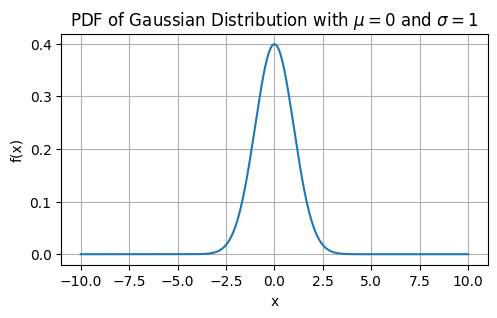

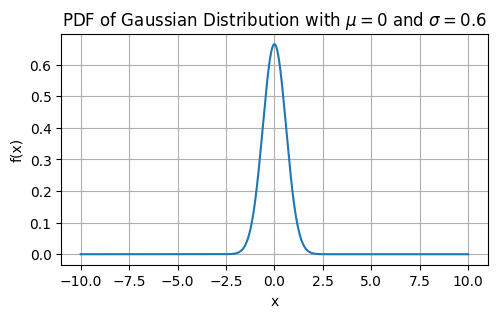

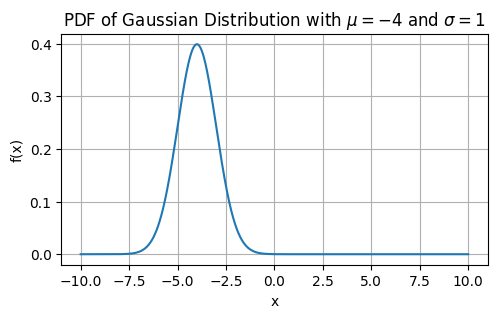

In [63]:
# we can define a Python function. Thanks to this definition, we can simply call it afterwards without needing to re-code it every time we want to change some parameters (variance and mean in this exemple).
def plot_gaussian_pdf(mu, sigma):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) # We define our Probability Density Function (PDF) and we compute its value in each of our x points. Check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book for the equations being used
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF of Gaussian Distribution with $\\mu={mu}$ and $\\sigma={sigma}$') # Set a title for the whole plot

# mean = 0, std = 1
plot_gaussian_pdf(mu=0, sigma=1)

# mean = 0, std = 0.6
plot_gaussian_pdf(mu=0, sigma=0.6)

# mean = -4, std = 1
plot_gaussian_pdf(mu=-4, sigma=1)    

Now, the UNIFORMLY DISTRIBUTION (also called rectangular distribution)
$$\begin{align*}
    f(x) &= 
    \begin{cases}
    \displaystyle \frac{1}{b-a}, & \text{for } a \le x \le b\\\\[6pt]
    0, & \text{for } x<a \text{ or } x>b
    \end{cases}
    \end{align*}$$

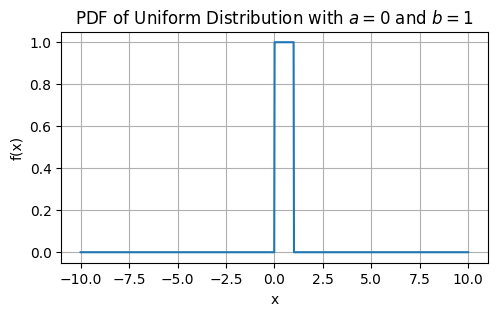

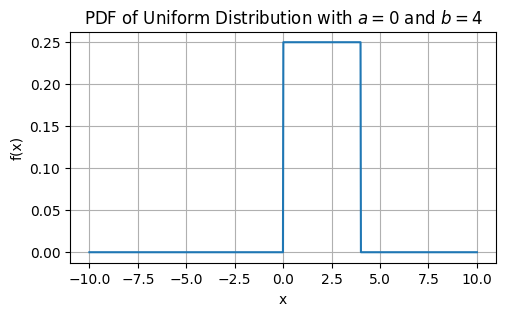

In [64]:
def plot_uniform_pdf(a, b):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.uniform.pdf(x, loc=a, scale=b) # Uniform PDF
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF of Uniform Distribution with $a={a}$ and $b={b}$') # Set a title for the whole plot

# a = 0, b = 1
plot_uniform_pdf(a=0, b=1)

# a = -2, b = 4
plot_uniform_pdf(a=0, b=4)

Lately, the BETA DISTRIBUTION
$$f(x,\alpha,\beta)=\frac{\Gamma(\alpha+\beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\\beta)}$$

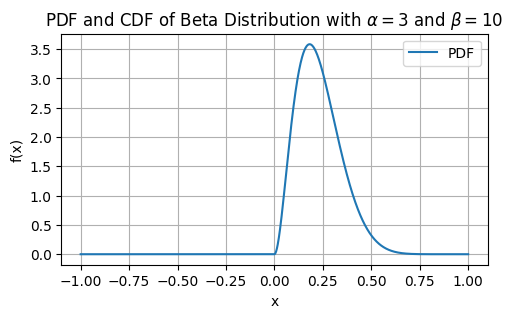

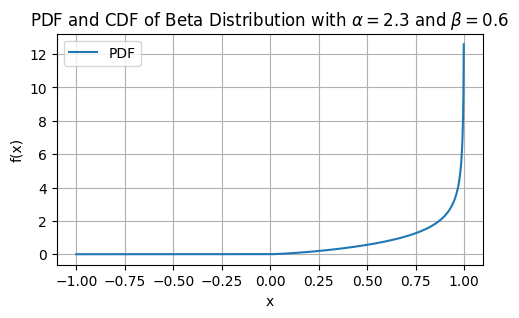

In [65]:
#Notice that a,b > 0.
def plot_beta_pdf(a, b):
    x = np.linspace(-1, 1, 1000) # Generate a vector from -1 to 1 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.beta.pdf(x, a, b) # Beta PDF
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.legend() # Plot a legend
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF and CDF of Beta Distribution with $\\alpha={a}$ and $\\beta={b}$') # Set a title for the whole plot

# alpha = 3, beta = 10
plot_beta_pdf(a=3, b=10)

# alpha = 2.3, beta = 0.6
plot_beta_pdf(a=2.3, b=0.6)

Finally, let's GENERATE RANDOM DATA from the different distributions discussed previously and compare them.

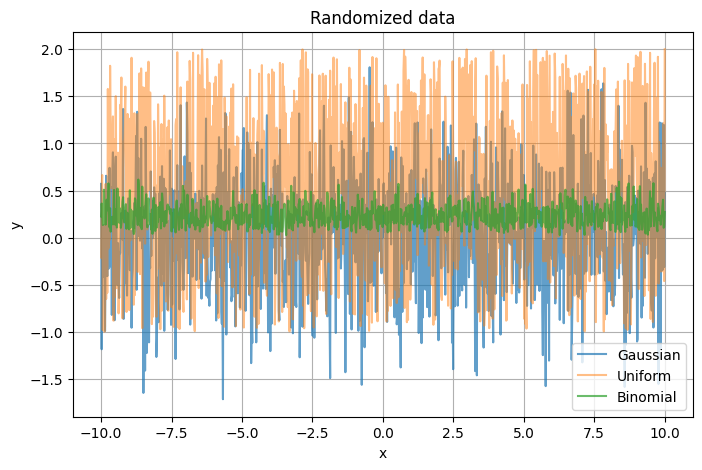

In [66]:
y_normal = np.random.normal(0,0.6,1000)
y_normal_sorted = np.sort(y_normal)

y_uniform = np.random.uniform(-1,2,1000)
y_uniform_sorted = np.sort(y_uniform)

y_beta = np.random.beta(3,10,1000)
y_beta_ordenat = np.sort(y_beta)

x = np.linspace(-10,10,1000)

fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(x, y_normal, label='Gaussian', alpha=0.7) # Plot the PDF and assign it a label
ax.plot(x, y_uniform, label='Uniform', alpha=0.5) # alpha is used to set the transparency of the plot
ax.plot(x, y_beta, label='Binomial', alpha=0.7)
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('Randomized data'); # Set a title for the whole plot

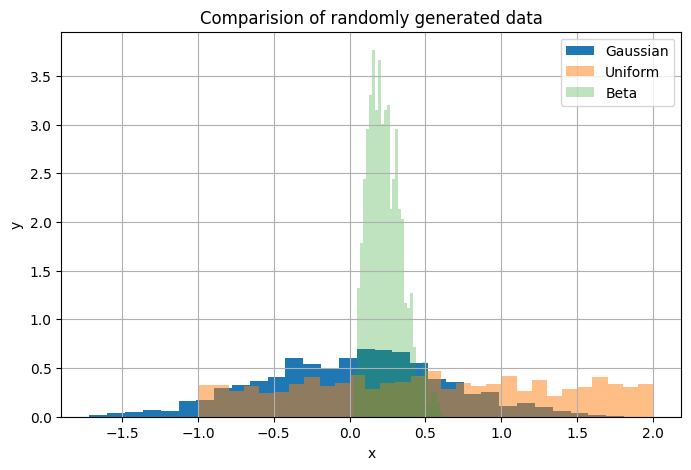

In [67]:
# Now, let's plot the histograms of the different random data generated previously to compare them and to see if the data sets follow the general form as expected from each distribution.
fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)

countN, binsN, ignoredN = plt.hist(y_normal, 30, density=True, label='Gaussian')
countU, binsU, ignoredU = plt.hist(y_uniform, 30, density=True, alpha=0.5, label='Uniform')
countB, binsB, ignoredB = plt.hist(y_beta, 30, density=True, alpha=0.3, label='Beta')

ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('x') # Add the x axis label
ax.set_ylabel('y') # Add the y axis label
ax.set_title('Comparision of randomly generated data'); # Set a title for the whole plot

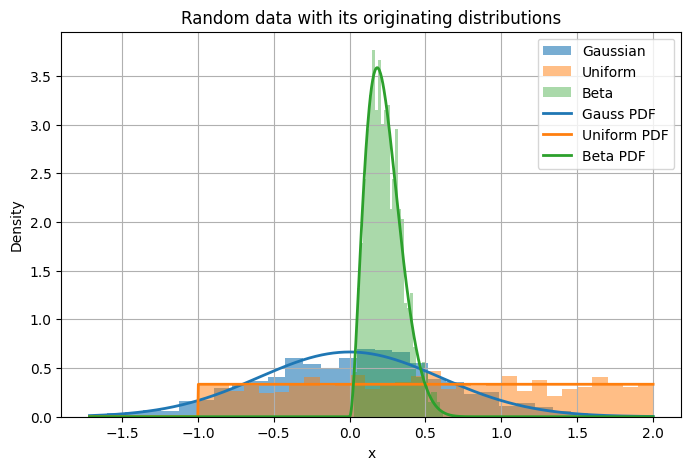

In [68]:
# Let's now plot the histograms of the different random data generated previously along with their corresponding Probability Density Functions (PDFs) to compare them and to see if the data sets follow the general form as expected from each distribution.

def plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=1, a=0, b=1, c=2, d=4):
    fig, ax = plt.subplots(figsize=(8,5))

    ax.hist(y_normal, bins=30, density=True, alpha=0.6, label='Gaussian')
    ax.hist(y_uniform, bins=30, density=True, alpha=0.5, label='Uniform')
    ax.hist(y_beta, bins=30, density=True, alpha=0.4, label='Beta')

    xmin = min(np.min(y_normal), np.min(y_uniform), np.min(y_beta))
    xmax = max(np.max(y_normal), np.max(y_uniform), np.max(y_beta))
    x = np.linspace(xmin, xmax, 1000)

    x_pdf_G = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdf_U = sp.stats.uniform.pdf(x, loc=a, scale=b-a)
    x_pdf_B = sp.stats.beta.pdf(x, c, d)

    ax.plot(x, x_pdf_G, color='C0', lw=2, label='Gauss PDF')
    ax.plot(x, x_pdf_U, color='C1', lw=2, label='Uniform PDF')
    ax.plot(x, x_pdf_B, color='C2', lw=2, label='Beta PDF')

    ax.grid(True)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title("Random data with its originating distributions")
    plt.show()

plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=0.6, a=-1, b=2, c=3, d=10)